In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Problem Statement

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

Demographics (city, age, gender etc.)
Tenure information (joining date, Last Date)
Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)
Dataset:

Dataset Link: ola_driver.csv

Column Profiling:

MMMM-YY : Reporting Date (Monthly)
Driver_ID : Unique id for drivers
Age : Age of the driver
Gender : Gender of the driver – Male : 0, Female: 1
City : City Code of the driver
Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
Income : Monthly average Income of the driver
Date Of Joining : Joining date for the driver
LastWorkingDate : Last date of working for the driver
Joining Designation : Designation of the driver at the time of joining
Grade : Grade of the driver at the time of reporting
Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

In [104]:
df=pd.read_csv(r"C:\Users\Asus\Downloads\scaler_notes\ola_driver_scaler.csv")
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


# Basic data exploration

In [105]:
df.shape

(19104, 14)

In [106]:
#check the datatype of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [107]:
#the columns LastWorkingDate,Dateofjoining and MMM-YY columns are in object format.we Can convert them into datetime format.
date_time_format=['MMM-YY','Dateofjoining','LastWorkingDate']
for i in date_time_format:
    df[i]=pd.to_datetime(df[i])

In [108]:
#check for number of null values in the dataset
df.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [109]:
#Unnamed :0 column is of no use for our analysis .This column can be dropped
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head(2)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2


# Null value Treatment

In [110]:
df.head(4)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1


In [111]:
gender_null=df[df['Gender'].isnull()]['Driver_ID']
df[df['Driver_ID'].isin(gender_null)].head(8)
##gender columns is null and non null for the same driver ID.We can replace the null values by non null gender values for respective driver ids


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
239,2019-01-01,43,27.0,1.0,C15,0,12906,2018-07-13,NaT,1,1,359890,1
240,2019-02-01,43,27.0,NaN,C15,0,12906,2018-07-13,2019-02-20,1,1,0,1
257,2019-01-01,49,21.0,0.0,C20,0,53039,2018-05-25,NaT,1,2,171760,1
258,2019-02-01,49,21.0,NaN,C20,0,53039,2018-05-25,NaT,1,2,0,1
259,2019-03-01,49,21.0,0.0,C20,0,53039,2018-05-25,NaT,1,2,392890,1
260,2019-04-01,49,21.0,0.0,C20,0,53039,2018-05-25,NaT,1,2,106160,1
261,2019-05-01,49,NaN,0.0,C20,0,53039,2018-05-25,NaT,1,2,124190,1
262,2019-06-01,49,21.0,0.0,C20,0,53039,2018-05-25,NaT,1,2,0,1


# KNN Imputer
#### we can also use the knn impter to find the gender and age of the drivers

In [112]:
data_num=df.select_dtypes(include=np.number)
data_num

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,28.0,0.0,2,57387,1,1,2381060,2
1,1,28.0,0.0,2,57387,1,1,-665480,2
2,1,28.0,0.0,2,57387,1,1,0,2
3,2,31.0,0.0,2,67016,2,2,0,1
4,2,31.0,0.0,2,67016,2,2,0,1
...,...,...,...,...,...,...,...,...,...
19099,2788,30.0,0.0,2,70254,2,2,740280,3
19100,2788,30.0,0.0,2,70254,2,2,448370,3
19101,2788,30.0,0.0,2,70254,2,2,0,2
19102,2788,30.0,0.0,2,70254,2,2,200420,2


In [113]:
##Need to drop Driver ID from the knn impurter data.This might influence during the knn predictions.
data_num=data_num.drop(columns='Driver_ID')
data_num

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,28.0,0.0,2,57387,1,1,2381060,2
1,28.0,0.0,2,57387,1,1,-665480,2
2,28.0,0.0,2,57387,1,1,0,2
3,31.0,0.0,2,67016,2,2,0,1
4,31.0,0.0,2,67016,2,2,0,1
...,...,...,...,...,...,...,...,...
19099,30.0,0.0,2,70254,2,2,740280,3
19100,30.0,0.0,2,70254,2,2,448370,3
19101,30.0,0.0,2,70254,2,2,0,2
19102,30.0,0.0,2,70254,2,2,200420,2


In [114]:
from sklearn.impute import KNNImputer
imputer=KNNImputer()
imputer.fit(data_num)
columns=data_num.columns
new_data=imputer.transform(data_num)
new_data=pd.DataFrame(new_data)
new_data.columns=columns
new_data.isnull().sum()
##no null values in age and gender columns of imputed data

Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

In [115]:
#concat other 
col=[]
for i in df.columns:
    if i not in columns:
        col.append(i)
df=pd.concat([df[col],new_data],axis=1)
df.head()

,MMM-YY,Driver_ID,City,Dateofjoining,LastWorkingDate,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,C23,2018-12-24,NaT,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,2019-02-01,1,C23,2018-12-24,NaT,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,2019-03-01,1,C23,2018-12-24,2019-03-11,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,2020-11-01,2,C7,2020-11-06,NaT,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,2020-12-01,2,C7,2020-11-06,NaT,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0


In [116]:
df.sort_values('Driver_ID')

,MMM-YY,Driver_ID,City,Dateofjoining,LastWorkingDate,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,C23,2018-12-24,NaT,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,2019-02-01,1,C23,2018-12-24,NaT,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,2019-03-01,1,C23,2018-12-24,2019-03-11,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,2020-11-01,2,C7,2020-11-06,NaT,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,2020-12-01,2,C7,2020-11-06,NaT,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19102,2020-11-01,2788,C27,2020-06-08,NaT,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0
19098,2020-07-01,2788,C27,2020-06-08,NaT,30.0,0.0,2.0,70254.0,2.0,2.0,497690.0,3.0
19097,2020-06-01,2788,C27,2020-06-08,NaT,29.0,0.0,2.0,70254.0,2.0,2.0,0.0,1.0
19099,2020-08-01,2788,C27,2020-06-08,NaT,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0


# Aggregation at driver ID level

In [117]:

data_agg={'MMM-YY':['max','min'], 'City':'first', 'Dateofjoining':'min', 'LastWorkingDate':'max',
       'Age':'max', 'Gender':'first', 'Education_Level':'first', 'Income':'sum', 'Joining Designation':'first',
       'Grade':'last', 'Total Business Value':'sum', 'Quarterly Rating':['first','last']}
df1=df.groupby('Driver_ID').agg(data_agg).reset_index()
#flattening of column names
df1.columns=[x+'_'+y for x,y in df1.columns]
df1

,Driver_ID_,MMM-YY_max,MMM-YY_min,City_first,Dateofjoining_min,LastWorkingDate_max,Age_max,Gender_first,Education_Level_first,Income_sum,Joining Designation_first,Grade_last,Total Business Value_sum,Quarterly Rating_first,Quarterly Rating_last
0,1,2019-03-01,2019-01-01,C23,2018-12-24,2019-03-11,28.0,0.0,2.0,172161.0,1.0,1.0,1715580.0,2.0,2.0
1,2,2020-12-01,2020-11-01,C7,2020-11-06,NaT,31.0,0.0,2.0,134032.0,2.0,2.0,0.0,1.0,1.0
2,4,2020-04-01,2019-12-01,C13,2019-12-07,2020-04-27,43.0,0.0,2.0,328015.0,2.0,2.0,350000.0,1.0,1.0
3,5,2019-03-01,2019-01-01,C9,2019-01-09,2019-03-07,29.0,0.0,0.0,139104.0,1.0,1.0,120360.0,1.0,1.0
4,6,2020-12-01,2020-08-01,C11,2020-07-31,NaT,31.0,1.0,1.0,393640.0,3.0,3.0,1265000.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,2020-12-01,2019-01-01,C24,2015-10-15,NaT,34.0,0.0,0.0,1987560.0,2.0,3.0,21748820.0,3.0,4.0
2377,2785,2020-10-01,2020-08-01,C9,2020-08-28,2020-10-28,34.0,1.0,0.0,36315.0,1.0,1.0,0.0,1.0,1.0
2378,2786,2019-09-01,2019-01-01,C19,2018-07-31,2019-09-22,45.0,0.0,0.0,318330.0,2.0,2.0,2815090.0,2.0,1.0
2379,2787,2019-06-01,2019-01-01,C20,2018-07-21,2019-06-20,28.0,1.0,2.0,416988.0,1.0,1.0,977830.0,2.0,1.0


# Feature Engineering

In [118]:
df1['target']=df1['LastWorkingDate_max'].fillna(value=0)
df1['target']=df1['target'].apply(lambda x:0 if x==0 else 1)
#creating target variable.If the last working day is present then the driver has left the platform or else not left
df1.head()

,Driver_ID_,MMM-YY_max,MMM-YY_min,City_first,Dateofjoining_min,LastWorkingDate_max,Age_max,Gender_first,Education_Level_first,Income_sum,Joining Designation_first,Grade_last,Total Business Value_sum,Quarterly Rating_first,Quarterly Rating_last,target
0,1,2019-03-01,2019-01-01,C23,2018-12-24,2019-03-11,28.0,0.0,2.0,172161.0,1.0,1.0,1715580.0,2.0,2.0,1
1,2,2020-12-01,2020-11-01,C7,2020-11-06,NaT,31.0,0.0,2.0,134032.0,2.0,2.0,0.0,1.0,1.0,0
2,4,2020-04-01,2019-12-01,C13,2019-12-07,2020-04-27,43.0,0.0,2.0,328015.0,2.0,2.0,350000.0,1.0,1.0,1
3,5,2019-03-01,2019-01-01,C9,2019-01-09,2019-03-07,29.0,0.0,0.0,139104.0,1.0,1.0,120360.0,1.0,1.0,1
4,6,2020-12-01,2020-08-01,C11,2020-07-31,NaT,31.0,1.0,1.0,393640.0,3.0,3.0,1265000.0,1.0,2.0,0


In [119]:
#to check increase in the quarterly ratings of the drivers
df1['inc_rating']=0
df1.loc[df1['Quarterly Rating_first']<df1['Quarterly Rating_last'],'inc_rating']=1
df1.loc[df1['Quarterly Rating_first']>df1['Quarterly Rating_last'],'inc_rating']=-1
df1.head()

,Driver_ID_,MMM-YY_max,MMM-YY_min,City_first,Dateofjoining_min,LastWorkingDate_max,Age_max,Gender_first,Education_Level_first,Income_sum,Joining Designation_first,Grade_last,Total Business Value_sum,Quarterly Rating_first,Quarterly Rating_last,target,inc_rating
0,1,2019-03-01,2019-01-01,C23,2018-12-24,2019-03-11,28.0,0.0,2.0,172161.0,1.0,1.0,1715580.0,2.0,2.0,1,0
1,2,2020-12-01,2020-11-01,C7,2020-11-06,NaT,31.0,0.0,2.0,134032.0,2.0,2.0,0.0,1.0,1.0,0,0
2,4,2020-04-01,2019-12-01,C13,2019-12-07,2020-04-27,43.0,0.0,2.0,328015.0,2.0,2.0,350000.0,1.0,1.0,1,0
3,5,2019-03-01,2019-01-01,C9,2019-01-09,2019-03-07,29.0,0.0,0.0,139104.0,1.0,1.0,120360.0,1.0,1.0,1,0
4,6,2020-12-01,2020-08-01,C11,2020-07-31,NaT,31.0,1.0,1.0,393640.0,3.0,3.0,1265000.0,1.0,2.0,0,1


# EXPLONATORY DATA ANALYSIS

In [120]:
df1.nunique()

Driver_ID_                   2381
MMM-YY_max                     24
MMM-YY_min                     24
City_first                     29
Dateofjoining_min             869
LastWorkingDate_max           493
Age_max                        61
Gender_first                    5
Education_Level_first           3
Income_sum                   2373
Joining Designation_first       5
Grade_last                      5
Total Business Value_sum     1629
Quarterly Rating_first          4
Quarterly Rating_last           4
target                          2
inc_rating                      3
dtype: int64

In [121]:
cat_var=df1.nunique().reset_index()
cat_var=list(cat_var[cat_var[0]<10]['index'])
#number of unique elements in each feature less than 10 is considered as categorical variable for this analysis

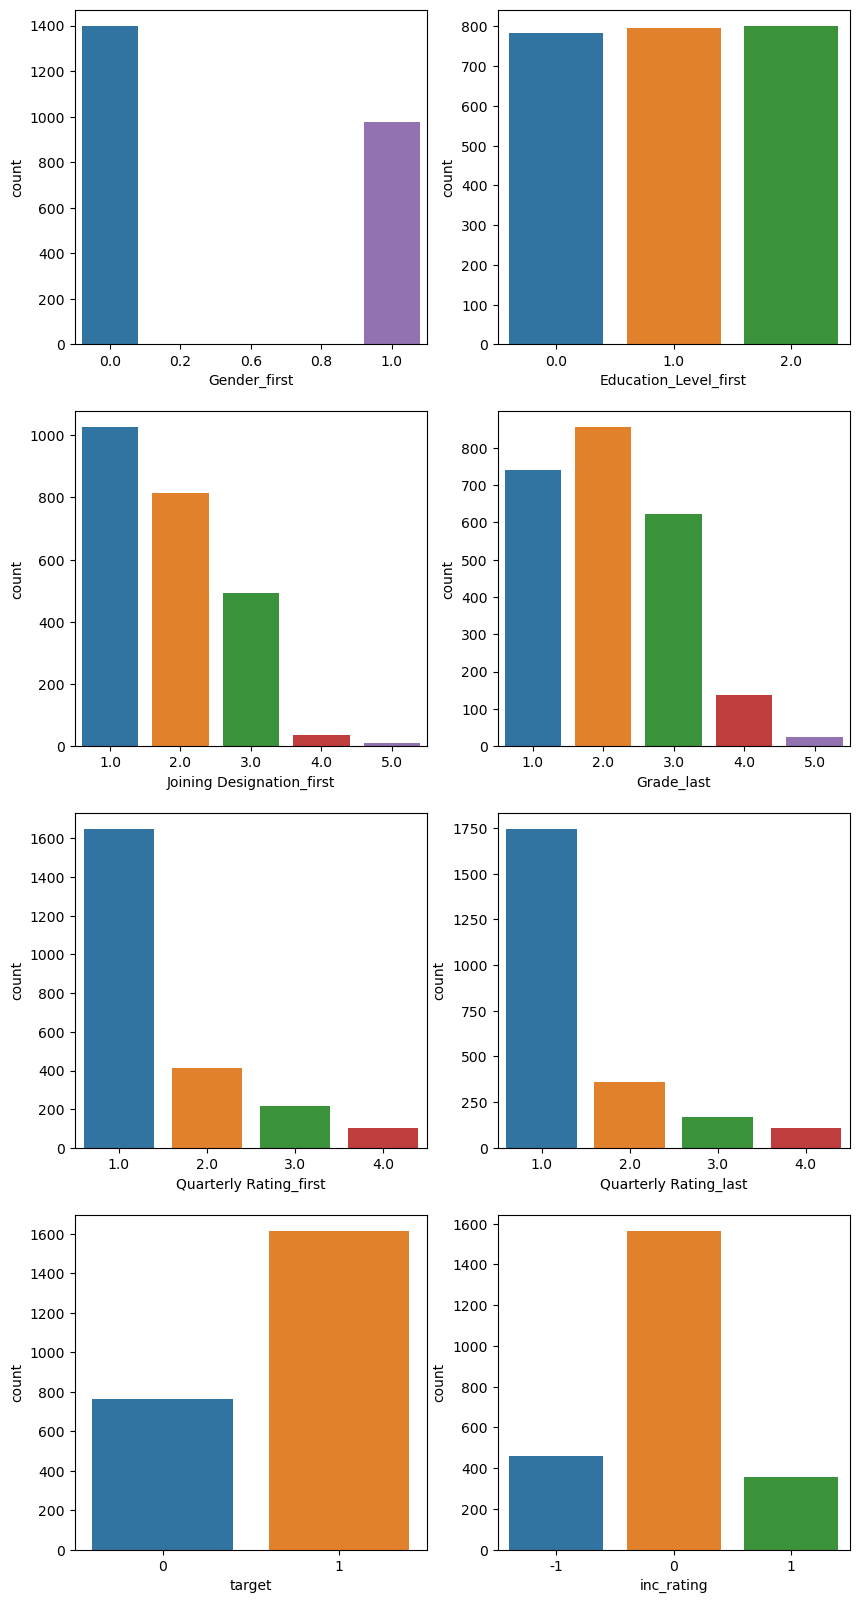

In [122]:
l=len(cat_var)+1
n=1
plt.figure(figsize=(10,20))
for i in cat_var:
    plt.subplot(l//2,2,n)
    n+=1
    sns.countplot(data=df1,x=i)

### Observations:
### 1.In gender column 0.2,0.6,0.8 are minority class and they are outliers in gender column.Lets drop these values form the data
### 2.drivers are equally distributed across different education level.Need to check for attrition rate for each education level
### 3.Joining designation:Most of the drivers join the ola platform at designation 1.
### 4.Less numbers of drivers were able to achieve increase in quarterly ratings and few drivers also underwent decrease in quarterly ratings.
### 

### Remove outliers from the Gender column

In [123]:
df1=df1[(df1['Gender_first']==0)|(df1['Gender_first']==1)]

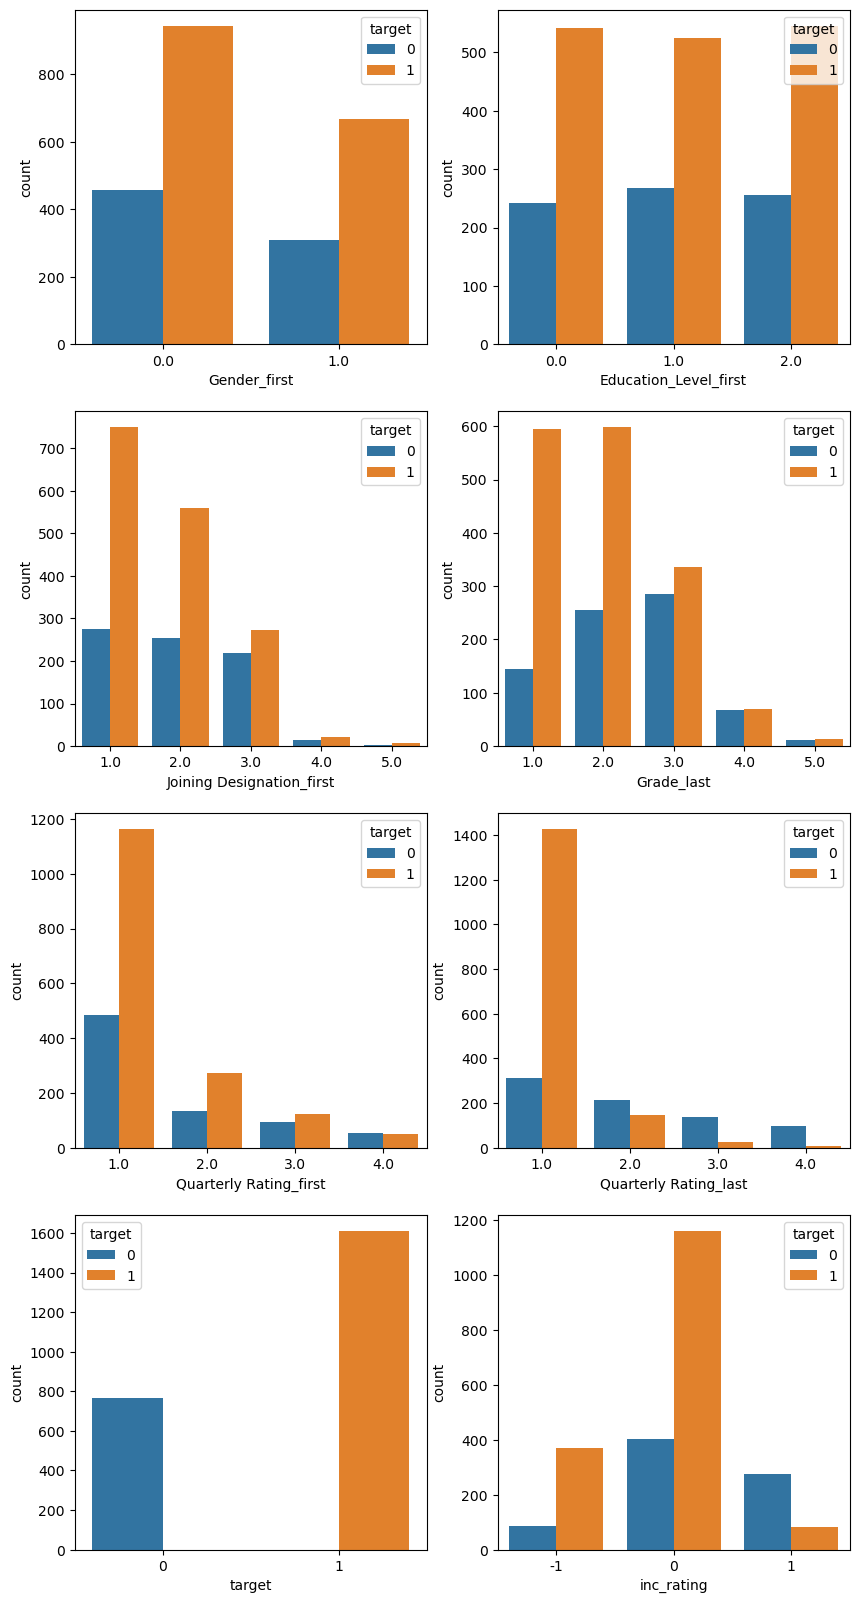

In [124]:
l=len(cat_var)+1
n=1
plt.figure(figsize=(10,20))
for i in cat_var:
    plt.subplot(l//2,2,n)
    n+=1
    sns.countplot(data=df1,x=i,hue='target')

## Observations:
### 1.Attrition rate is lesser incase of increased quarterly rating of the drivers.The drivers with no change in rating and decrease in their quarterly ratings are more prone to leave the platform.
### 2.Retention of drivers increase with increase in the grade of the drivers.
### 3.Drivers with better quarterly ratings are going to retain on the platform
### 4.No significance difference in retention between different genders.

In [125]:
df1.rename(columns={'Driver_ID_':'driver_id', 'MMM-YY_max':'first_month', 'MMM-YY_min':'last_month', 'City_first':'city',
       'Dateofjoining_min':'joining_date', 'LastWorkingDate_max':'last_working_date', 'Age_max':'age', 'Gender_first':'gender',
       'Education_Level_first':'education', 'Income_sum':'income', 'Joining Designation_first':'joining_designation',
       'Grade_last':'grade', 'Total Business Value_sum':'total_business', 'Quarterly Rating_first':'initial_rating',
       'Quarterly Rating_last':'last_rating'},inplace=True)
df1.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_30432\3517859726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'Driver_ID_':'driver_id', 'MMM-YY_max':'first_month', 'MMM-YY_min':'last_month', 'City_first':'city',


,driver_id,first_month,last_month,city,joining_date,last_working_date,age,gender,education,income,joining_designation,grade,total_business,initial_rating,last_rating,target,inc_rating
0,1,2019-03-01,2019-01-01,C23,2018-12-24,2019-03-11,28.0,0.0,2.0,172161.0,1.0,1.0,1715580.0,2.0,2.0,1,0
1,2,2020-12-01,2020-11-01,C7,2020-11-06,NaT,31.0,0.0,2.0,134032.0,2.0,2.0,0.0,1.0,1.0,0,0
2,4,2020-04-01,2019-12-01,C13,2019-12-07,2020-04-27,43.0,0.0,2.0,328015.0,2.0,2.0,350000.0,1.0,1.0,1,0
3,5,2019-03-01,2019-01-01,C9,2019-01-09,2019-03-07,29.0,0.0,0.0,139104.0,1.0,1.0,120360.0,1.0,1.0,1,0
4,6,2020-12-01,2020-08-01,C11,2020-07-31,NaT,31.0,1.0,1.0,393640.0,3.0,3.0,1265000.0,1.0,2.0,0,1


#### check any seasonality in attrition of drivers

In [126]:
from datetime import datetime
df1['last_month_year']=df1['last_working_date'].dt.strftime('%Y-%m')
df1.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_30432\1853782290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['last_month_year']=df1['last_working_date'].dt.strftime('%Y-%m')


,driver_id,first_month,last_month,city,joining_date,last_working_date,age,gender,education,income,joining_designation,grade,total_business,initial_rating,last_rating,target,inc_rating,last_month_year
0,1,2019-03-01,2019-01-01,C23,2018-12-24,2019-03-11,28.0,0.0,2.0,172161.0,1.0,1.0,1715580.0,2.0,2.0,1,0,2019-03
1,2,2020-12-01,2020-11-01,C7,2020-11-06,NaT,31.0,0.0,2.0,134032.0,2.0,2.0,0.0,1.0,1.0,0,0,NaN
2,4,2020-04-01,2019-12-01,C13,2019-12-07,2020-04-27,43.0,0.0,2.0,328015.0,2.0,2.0,350000.0,1.0,1.0,1,0,2020-04
3,5,2019-03-01,2019-01-01,C9,2019-01-09,2019-03-07,29.0,0.0,0.0,139104.0,1.0,1.0,120360.0,1.0,1.0,1,0,2019-03
4,6,2020-12-01,2020-08-01,C11,2020-07-31,NaT,31.0,1.0,1.0,393640.0,3.0,3.0,1265000.0,1.0,2.0,0,1,NaN


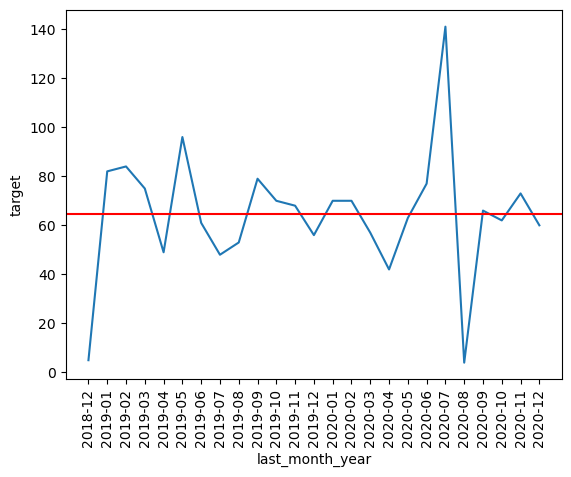

In [127]:
df2=df1.groupby('last_month_year')['target'].sum().reset_index().sort_values('last_month_year')
sns.lineplot(data=df2,x='last_month_year',y='target')
plt.xticks(rotation=90)
m=np.mean(df2['target'])
plt.axhline(y=m,color='red')
plt.show()
##NO seasonality in the attrition of drivers.but the attrition number is high for the month of june 2020

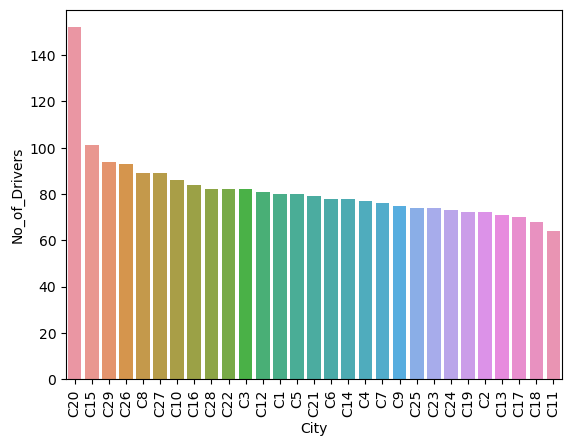

In [128]:
df2=df1['city'].value_counts().reset_index()
sns.barplot(data=df2,x='index',y='city')
plt.xlabel('City')
plt.ylabel('No_of_Drivers')
plt.xticks(rotation=90)
plt.show()

33.44494103041589
34.46535947712418


<AxesSubplot:xlabel='target', ylabel='age'>

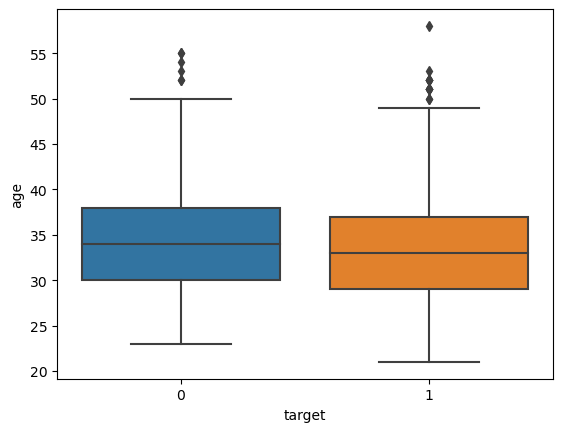

In [129]:
print(df1[df1['target']==1]['age'].mean())
print(df1[df1['target']==0]['age'].mean())
sns.boxplot(data=df1,y='age',x='target')
## no much difference in age of the drivers based on attrition

<AxesSubplot:xlabel='target', ylabel='total_business'>

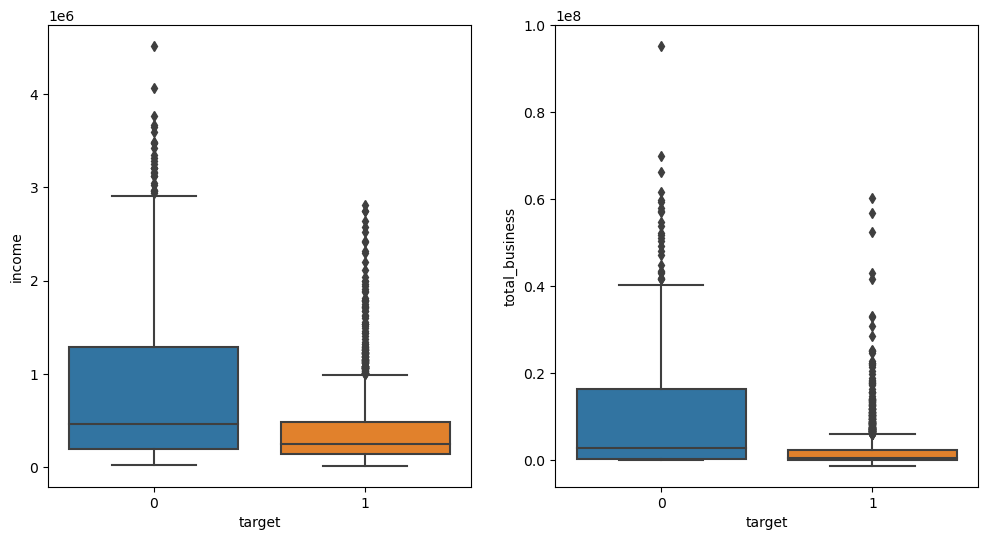

In [130]:
## income impact on attrition rate
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=df1,y='income',x='target')
plt.subplot(1,2,2)
sns.boxplot(data=df1,y='total_business',x='target')

# Observation:
### 1.Exited drivers have low median income when compared to the drivers who are still working with ola
### 2.Exited drivers brings lower business compared with the retained drivers.

# Data preprocessing for the Classification modelling


In [131]:
df1.head(3)

,driver_id,first_month,last_month,city,joining_date,last_working_date,age,gender,education,income,joining_designation,grade,total_business,initial_rating,last_rating,target,inc_rating,last_month_year
0,1,2019-03-01,2019-01-01,C23,2018-12-24,2019-03-11,28.0,0.0,2.0,172161.0,1.0,1.0,1715580.0,2.0,2.0,1,0,2019-03
1,2,2020-12-01,2020-11-01,C7,2020-11-06,NaT,31.0,0.0,2.0,134032.0,2.0,2.0,0.0,1.0,1.0,0,0,NaN
2,4,2020-04-01,2019-12-01,C13,2019-12-07,2020-04-27,43.0,0.0,2.0,328015.0,2.0,2.0,350000.0,1.0,1.0,1,0,2020-04


In [132]:
#dropping the columns which are not necessary for the model
df1=df1.drop(columns=['first_month','last_month','joining_date','last_month_year'])
df1.head(2)

,driver_id,city,last_working_date,age,gender,education,income,joining_designation,grade,total_business,initial_rating,last_rating,target,inc_rating
0,1,C23,2019-03-11,28.0,0.0,2.0,172161.0,1.0,1.0,1715580.0,2.0,2.0,1,0
1,2,C7,NaT,31.0,0.0,2.0,134032.0,2.0,2.0,0.0,1.0,1.0,0,0


In [133]:
df1=df1.drop(columns=['last_working_date'])
df1

,driver_id,city,age,gender,education,income,joining_designation,grade,total_business,initial_rating,last_rating,target,inc_rating
0,1,C23,28.0,0.0,2.0,172161.0,1.0,1.0,1715580.0,2.0,2.0,1,0
1,2,C7,31.0,0.0,2.0,134032.0,2.0,2.0,0.0,1.0,1.0,0,0
2,4,C13,43.0,0.0,2.0,328015.0,2.0,2.0,350000.0,1.0,1.0,1,0
3,5,C9,29.0,0.0,0.0,139104.0,1.0,1.0,120360.0,1.0,1.0,1,0
4,6,C11,31.0,1.0,1.0,393640.0,3.0,3.0,1265000.0,1.0,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,C24,34.0,0.0,0.0,1987560.0,2.0,3.0,21748820.0,3.0,4.0,0,1
2377,2785,C9,34.0,1.0,0.0,36315.0,1.0,1.0,0.0,1.0,1.0,1,0
2378,2786,C19,45.0,0.0,0.0,318330.0,2.0,2.0,2815090.0,2.0,1.0,1,-1
2379,2787,C20,28.0,1.0,2.0,416988.0,1.0,1.0,977830.0,2.0,1.0,1,-1


In [134]:
df1=df1.drop(columns='driver_id')

In [135]:
#One hot encoding for columns city
df1=pd.get_dummies(df1,columns=['city'])
df1.head()

,age,gender,education,income,joining_designation,grade,total_business,initial_rating,last_rating,target,...,city_C27,city_C28,city_C29,city_C3,city_C4,city_C5,city_C6,city_C7,city_C8,city_C9
0,28.0,0.0,2.0,172161.0,1.0,1.0,1715580.0,2.0,2.0,1,...,0,0,0,0,0,0,0,0,0,0
1,31.0,0.0,2.0,134032.0,2.0,2.0,0.0,1.0,1.0,0,...,0,0,0,0,0,0,0,1,0,0
2,43.0,0.0,2.0,328015.0,2.0,2.0,350000.0,1.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,29.0,0.0,0.0,139104.0,1.0,1.0,120360.0,1.0,1.0,1,...,0,0,0,0,0,0,0,0,0,1
4,31.0,1.0,1.0,393640.0,3.0,3.0,1265000.0,1.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
X=df1.drop(columns='target')
y=df1['target']

In [141]:
#scale the columns using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
col=X.columns
X=scaler.fit_transform(X)
X=pd.DataFrame(X)
X.columns=col
X

,age,gender,education,income,joining_designation,grade,total_business,initial_rating,last_rating,inc_rating,...,city_C27,city_C28,city_C29,city_C3,city_C4,city_C5,city_C6,city_C7,city_C8,city_C9
0,0.189189,0.0,1.0,0.035751,0.00,0.00,0.032064,0.333333,0.333333,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.270270,0.0,1.0,0.027299,0.25,0.25,0.014326,0.000000,0.000000,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.594595,0.0,1.0,0.070300,0.25,0.25,0.017944,0.000000,0.000000,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.216216,0.0,0.0,0.028423,0.00,0.00,0.015570,0.000000,0.000000,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.270270,1.0,0.5,0.084847,0.50,0.50,0.027405,0.000000,0.333333,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,0.351351,0.0,0.0,0.438176,0.25,0.50,0.239197,0.666667,1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2372,0.351351,1.0,0.0,0.005638,0.00,0.00,0.014326,0.000000,0.000000,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2373,0.648649,0.0,0.0,0.068153,0.25,0.25,0.043432,0.333333,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2374,0.189189,1.0,1.0,0.090023,0.00,0.00,0.024436,0.333333,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1782, 39) (594, 39) (1782,) (594,)


# Random forest Classifiers

In [147]:
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

In [148]:
param = {'max_depth':[2,3,4], 'n_estimators':[50,100,150,200]}
random_forest = RandomForestClassifier(class_weight ='balanced')
c = GridSearchCV(random_forest,param,cv=3,scoring='f1')
c.fit(x_train,y_train)
def display(results):
 print(f'Best parameters are : {results.best_params_}')
 print(f'The score is : {results.best_score_}')
display(c)
y_pred = c.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Best parameters are : {'max_depth': 4, 'n_estimators': 50}
The score is : 0.8660115133161342
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       194
           1       0.83      0.87      0.85       400

    accuracy                           0.79       594
   macro avg       0.77      0.76      0.76       594
weighted avg       0.79      0.79      0.79       594

[[125  69]
 [ 53 347]]


#### 1.The Random Forest With Class Weighting method out of all predicted 0 the measure of correctly predicted is 70%, and for 1 it is 83%(Precision).
#### 2.The Random Forest With Class Weighting method out of all actual 0 the measure of correctly predicted is 64%, and for 1 it is 87%(Recall).


In [150]:
param = {'max_depth':[2,3,4], 'n_estimators':[50,100,150,200]}
random_forest = RandomForestClassifier(class_weight ='balanced_subsample')
c = GridSearchCV(random_forest,param,cv=3,scoring='f1')
c.fit(x_train,y_train)
def display(results):
 print(f'Best parameters are : {results.best_params_}')
 print(f'The score is : {results.best_score_}')
display(c)
y_pred = c.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Best parameters are : {'max_depth': 4, 'n_estimators': 150}
The score is : 0.8640145894423344
              precision    recall  f1-score   support

           0       0.72      0.63      0.67       194
           1       0.83      0.88      0.86       400

    accuracy                           0.80       594
   macro avg       0.78      0.76      0.76       594
weighted avg       0.80      0.80      0.80       594

[[123  71]
 [ 48 352]]


### 1.The Random Forest With Bootstrap Class Weighting method out of all predicted 0 the measure of correctly predicted is 72%, and for 1 it is 83%(Precision).
### 2.The Random Forest With Bootstrap Class Weighting method out of all actual 0 the measure of correctly predicted is 63%, and for 1 it is 88%(Recall).

## XGBoost Algorithm

In [151]:
import xgboost as xgb
my_model = xgb.XGBClassifier(class_weight ='balanced')
#
my_model.fit(x_train, y_train)

# Predicting the Test set results
y_pred = my_model.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.73      0.62      0.67       194
           1       0.83      0.89      0.86       400

    accuracy                           0.80       594
   macro avg       0.78      0.75      0.76       594
weighted avg       0.79      0.80      0.80       594

[[120  74]
 [ 45 355]]


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [07:48:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


#### 1.The XGBoost method out of all predicted 0 the measure of correctly predicted is 73%, and for 1 it is 83%(Precision).
#### 2.The XGBoost method out of all actual 0 the measure of correctly predicted is 62%, and for 1 it is 89%(Recall).

# Decision Tree Classifier

In [154]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.59      0.63      0.61       194
           1       0.81      0.79      0.80       400

    accuracy                           0.74       594
   macro avg       0.70      0.71      0.70       594
weighted avg       0.74      0.74      0.74       594

[[122  72]
 [ 85 315]]


<AxesSubplot:>

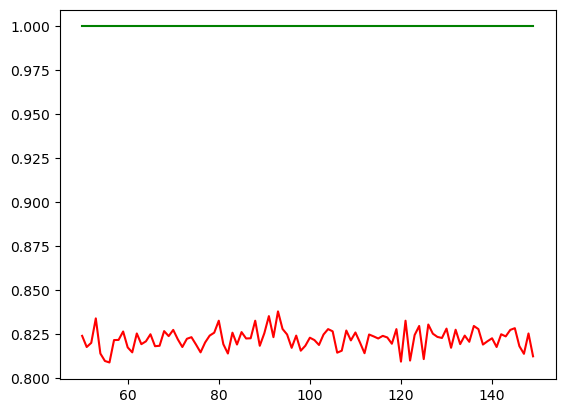

In [158]:
#Lets check,How precision and recall varies with change in max depth of the decision tree
#Later compare with train and test performances to check overfitting and underfitting
from sklearn.metrics import precision_score,recall_score
precision_train=[]
precision_test=[]
for i in range(50,150):
    clf = DecisionTreeClassifier()
    clf = clf.fit(x_train,y_train)
    y_pred_test = clf.predict(x_test)
    y_pred_train = clf.predict(x_train)
    precision_train.append(precision_score(y_train,y_pred_train))
    precision_test.append(precision_score(y_test,y_pred_test))
sns.lineplot(x=range(50,150),y=precision_test,color='red')
sns.lineplot(x=range(50,150),y=precision_train,color='green')
#there is no significant improvement in precison score of the test data.But,the precision score of train data is 100%.
##to improve the precision.It is better to use random forest algorithm

# Random forest and Calculating importance of features

In [159]:
param = {'max_depth':[2,3,4], 'n_estimators':[50,100,150,200]}
random_forest = RandomForestClassifier(class_weight ='balanced')
random_forest.fit(x_train,y_train)
def display(results):
 print(f'Best parameters are : {results.best_params_}')
 print(f'The score is : {results.best_score_}')
display(c)


Best parameters are : {'max_depth': 4, 'n_estimators': 150}
The score is : 0.8640145894423344


In [162]:
import time

import numpy as np

start_time = time.time()
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.009 seconds


In [165]:
pd.DataFrame(zip(x_train.columns,std)).sort_values(by=1,ascending=False)[:20]

,0,1
8,last_rating,0.090869
9,inc_rating,0.055766
6,total_business,0.055748
3,income,0.048885
5,grade,0.018361
0,age,0.017138
4,joining_designation,0.015265
7,initial_rating,0.009228
2,education,0.009062
1,gender,0.006926


# Observations and Recommendations:
#### 1.The drivers attrition mainly depends on Last rating,Increase or decrease in the rating,total business and income per month
#### 2.Drivers with low quarterly ratings are more likely to leave the platform due to rating based incentive system.(low rating=lower incentives.
#### 3.Drivers with no increase in the ratings are less motivated to drive.Company should focus on incremental rating to keep drivers happy and motivated
#### 4.Focus on increasing the income of the drivers to keep them motivated.